## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_complete.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Extract subsets for drug regimen and tumor volume
drug_tumor = mouse_study_complete[["Drug Regimen", "Tumor Volume (mm3)"]]
df = drug_tumor.groupby(by="Drug Regimen", as_index=True)
df_main = df[["Drug Regimen","Tumor Volume (mm3)"]]
df_tumor_vol = df[["Tumor Volume (mm3)"]]
df_mean = df_main.mean()
df_median = df_tumor_vol.median()
df_var = df_tumor_vol.var()
df_std = df_tumor_vol.std()
df_sem = df_tumor_vol.sem()
summary_stats = pd.concat([df_mean, df_median, df_var, df_std, df_sem], axis=1)
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

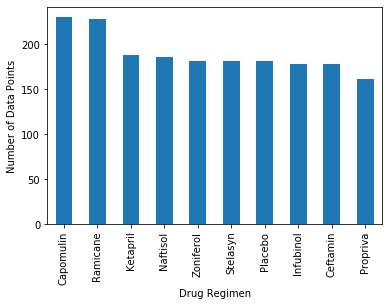

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_groups = mouse_study_complete.groupby('Drug Regimen')

data_points = drug_groups['Timepoint'].count()

drug_chart = data_points.sort_values(ascending=False).plot(kind="bar")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Data Points")

plt.show()


In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot



## Pie plots

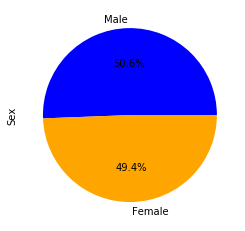

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mouse_study_complete.groupby("Sex")

colors = ["blue", "orange"]
# Find out how many of each gender took bike trips
male_female_count = sex_df['Sex'].count()

# Chart our data, give it a title, and label the axes
m_f_chart = male_female_count.sort_values(ascending=False).plot(kind="pie", colors=colors, autopct="%1.1f%%")

plt.show()

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine four most promising treatment regimens i.e. drugs with lowest SEM from summary_stats
drugs_sem = summary_stats[["Tumor Volume Std. Err."]]
top_4 = (drugs_sem.sort_values("Tumor Volume Std. Err.")).head(4)
top_4
top_4_drugs = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]


# Create a groupby variable that groups tumor vol by drug regimen and mouse ID
y_y = mouse_study_complete.rename(columns = {"Drug Regimen":"Drugs"})

df = y_y[y_y.Drugs.isin(top_4_drugs)]

df = df[df.Timepoint == 45]

df_ramicane = df[df.Drugs == top_4_drugs[0]]
df_capomulin = df[df.Drugs == top_4_drugs[1]]
df_ceftamin = df[df.Drugs == top_4_drugs[2]]
df_infubinol = df[df.Drugs == top_4_drugs[3]]

quart_ramicane = df_ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quart_capomulin = df_capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quart_ceftamin = df_ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quart_infubinol = df_infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq_ram = quart_ramicane[0.25]
upperq_ram = quart_ramicane[0.75]
midq_ram = quart_ramicane[0.5]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

print(f"The lower quartile of {top_4_drugs[0]} is: {lowerq_ram}")
print(f"The upper quartile of {top_4_drugs[0]} is: {upperq_ram}")
print(f"The interquartile range of {top_4_drugs[0]} is: {iqr_ram}")
print(f"The the median of {top_4_drugs[0]} is: {midq_ram} ")
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

out_ram = df_ramicane.loc[df_ramicane["Tumor Volume (mm3)"] > upper_bound_ram, ["Tumor Volume (mm3)"]]
print(out_ram)
out_ram = df_ramicane.loc[df_ramicane["Tumor Volume (mm3)"] < lower_bound_ram, ["Tumor Volume (mm3)"]]
print(out_ram)     
print("----------------------------------------------------------------------------------------------------")
lowerq_cap = quart_capomulin[0.25]
upperq_cap = quart_capomulin[0.75]
midq_cap = quart_capomulin[0.5]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

print(f"The lower quartile of {top_4_drugs[1]} is: {lowerq_cap}")
print(f"The upper quartile of {top_4_drugs[1]} is: {upperq_cap}")
print(f"The interquartile range of {top_4_drugs[1]} is: {iqr_cap}")
print(f"The the median of {top_4_drugs[1]} is: {midq_cap} ")
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

out_cap = df_capomulin.loc[df_capomulin["Tumor Volume (mm3)"] > upper_bound_cap, ["Tumor Volume (mm3)"]]
print(out_cap)
out_cap = df_capomulin.loc[df_capomulin["Tumor Volume (mm3)"] < lower_bound_cap, ["Tumor Volume (mm3)"]]
print(out_cap)
print("----------------------------------------------------------------------------------------------------")

lowerq_cef = quart_ceftamin[0.25]
upperq_cef = quart_ceftamin[0.75]
midq_cef = quart_ceftamin[0.5]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

print(f"The lower quartile of {top_4_drugs[2]} is: {lowerq_cef}")
print(f"The upper quartile of {top_4_drugs[2]} is: {upperq_cef}")
print(f"The interquartile range of {top_4_drugs[2]} is: {iqr_cef}")
print(f"The the median of {top_4_drugs[2]} is: {midq_cef} ")
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

out_cef = df_ceftamin.loc[df_ceftamin["Tumor Volume (mm3)"] > upper_bound_cef, ["Tumor Volume (mm3)"]]
print(out_cef)
out_cap = df_ceftamin.loc[df_ceftamin["Tumor Volume (mm3)"] < lower_bound_cef, ["Tumor Volume (mm3)"]]
print(out_cef)
print("----------------------------------------------------------------------------------------------------")

lowerq_inf = quart_infubinol[0.25]
upperq_inf = quart_infubinol[0.75]
midq_inf = quart_infubinol[0.5]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

print(f"The lower quartile of {top_4_drugs[3]} is: {lowerq_inf}")
print(f"The upper quartile of {top_4_drugs[3]} is: {upperq_inf}")
print(f"The interquartile range of {top_4_drugs[3]} is: {iqr_inf}")
print(f"The the median of {top_4_drugs[3]} is: {midq_cef} ")
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

out_inf = df_infubinol.loc[df_infubinol["Tumor Volume (mm3)"] > upper_bound_inf, ["Tumor Volume (mm3)"]]
print(out_inf)
out_cap = df_infubinol.loc[df_infubinol["Tumor Volume (mm3)"] < lower_bound_inf, ["Tumor Volume (mm3)"]]
print(out_inf)
print("----------------------------------------------------------------------------------------------------")

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
----------------------------------------------------------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
----------------------------------------------------------------

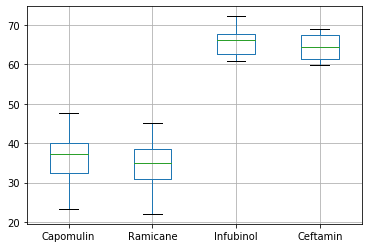

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Example outlier plot of reaction times from 3/Activities/02
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
#np.random.seed(1234)
#df = pd.DataFrame(np.random.randn(10, 4),
#                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

df_capomulin = df_capomulin.drop(columns=["Mouse ID", "Drugs", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
df_ramicane = df_ramicane.drop(columns=["Mouse ID", "Drugs", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
df_infubinol = df_infubinol.drop(columns=["Mouse ID", "Drugs", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
df_ceftamin = df_ceftamin.drop(columns=["Mouse ID", "Drugs", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])

df_capomulin = df_capomulin.rename(columns = {"Tumor Volume (mm3)":"Capomulin"})
df_ramicane = df_ramicane.rename(columns = {"Tumor Volume (mm3)":"Ramicane"})
df_infubinol = df_infubinol.rename(columns = {"Tumor Volume (mm3)":"Infubinol"})
df_ceftamin = df_ceftamin.rename(columns = {"Tumor Volume (mm3)":"Ceftamin"})




df_box_plot = pd.concat([df_capomulin, df_ramicane, df_infubinol, df_ceftamin], axis=1)
#df_box_plot
box_plot = df_box_plot.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])



## Line and scatter plots

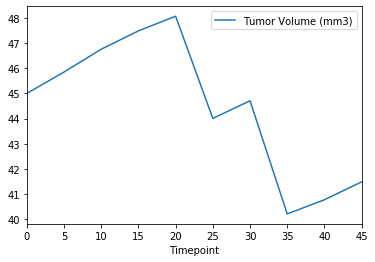

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

df_line_starter = y_y[y_y.Drugs.isin(top_4_drugs)]

df_cap_line = df_line_starter[df_line_starter.Drugs == top_4_drugs[1]]

z_z = df_cap_line.rename(columns = {"Mouse ID":"Mouse"})

df_cap_l509 = z_z[z_z.Mouse == "l509"]

lines = df_cap_l509.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

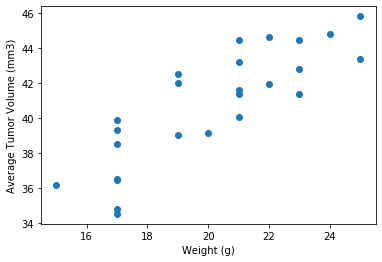

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_starter_df = z_z.groupby(["Mouse", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
avg_starter_df



x_values = avg_starter_df['Weight (g)']
y_values = avg_starter_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


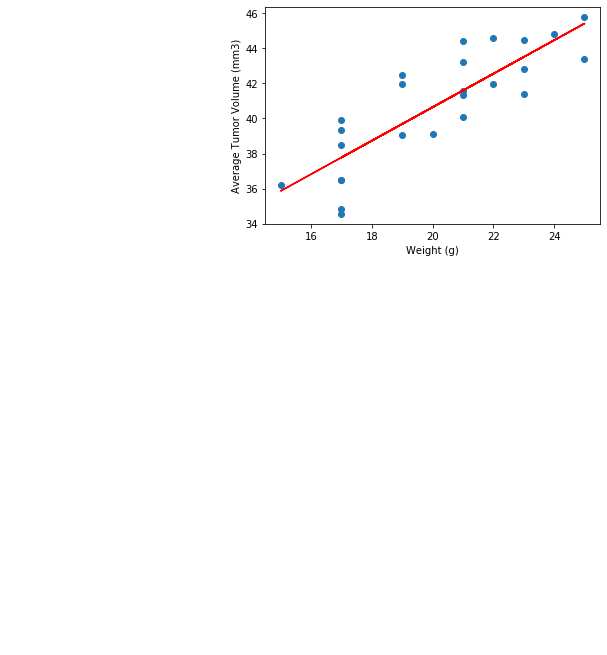

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


x_values = avg_starter_df['Weight (g)']
y_values = avg_starter_df['Tumor Volume (mm3)']

y_values = avg_starter_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


